<a href="https://colab.research.google.com/github/mayankjain281/Project_2_Netflix/blob/main/Project_2_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Data Exploration


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/netflix.csv')
#Importing Libraries & Loading dataset

In [ ]:
type(df)
#type of dataset is Pandas DataFrame

pandas.core.frame.DataFrame

In [ ]:
df.shape
#(rows, columns)

(8807, 14)

In [ ]:
df.size
#total no. of elements

123298

In [ ]:
df.index
#df.index.values
#list(df.index)

RangeIndex(start=0, stop=8807, step=1)

In [ ]:
df.index.size
#df.shape[0]
#len(df.index)
#len(df)

8807

In [ ]:
df.columns
#df.keys()
#list(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'dt_Year', 'dt_Month'],
      dtype='object')

In [ ]:
df.columns.size
#df.shape[1]
#len(df.columns)
#len(df.keys())

14

In [ ]:
df.info()
#only one interger column release_year is showing, to do numeric analysis.
#duration column needs to converted to integer by removing 'min' from it.
#date_added column is object string type, need to convert it to datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()
#show_id and title column has same len as len of rows, so they are unique identifier for df.
#type column has only 2 catagories or unique values.

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
df['rating'].value_counts()
#we should check unique values in each column also.
#rating column showing 3 unrelevent values (form duration) so you can fix, use or drop them.

In [ ]:
df.isna().sum()
#df.isna().sum()/len(df)*100 can give percentage
#we can take decision like, if 2-30% then we will impute values, if 0-2% then will ignore or drop.
#director column has most number of missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.describe()
#the oldest relese movie is from year 1925

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#Dealing with nested data columns

In [ ]:
df.head()
#nested column present in dataset are - listed_in, cast, director, country

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dt_Year,dt_Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [ ]:
#function for split any nested column and stack it then merged with origional dataframe.
def cons(col):
  spliting =df[col].apply(lambda x : str(x).split(', ')).tolist()
  df_new = pd.DataFrame(spliting, index=df['title'])
  df_new = df_new.stack()
  df_new = pd.DataFrame(df_new)
  df_new.reset_index(inplace=True)
  df_new = df_new[['title',0]]
  df_new.columns = ['title',col]
  df_new=df_new.merge(df, on='title', suffixes=('','_remove'))
  return(df_new)

In [ ]:
genre_split=cons('listed_in')
genre_split.drop([i for i in genre_split.columns if 'remove' in i], axis=1, inplace=True)
genre_split['listed_in'].value_counts().head(4)
#International Movies or TV Show are quite popular across all countries
#Drama & Comedy are the most popular genres across the countries

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'top tv-show listed_in')

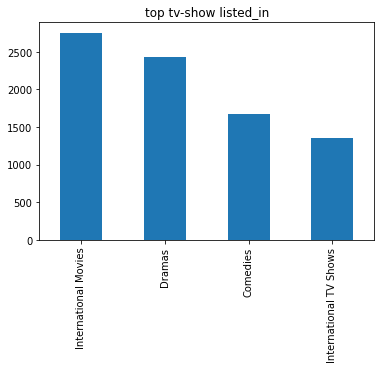

In [ ]:
genre_split['listed_in'].value_counts().head(4).plot(kind = 'bar')
plt.title("top tv-show listed_in")

In [ ]:
len([i for i in genre_split['listed_in'] if 'Comedy' in i or 'Comedies' in i])
#len(genre_split[genre_split['listed_in'].isin(['Comedies', 'TV Comedies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows'])])
#records where the movies or TV shows belong to the Comedy genre are 2255.

2439

In [ ]:
genre_split.dropna(subset=['country'], inplace = True)
genre_split[genre_split['country'].isin([i for i in genre_split['country'] if 'Japan' in i])]['listed_in'].value_counts()
df[df['country']=='Japan']['listed_in'].value_counts().head()
#we can check directly or can check the genre after unpacking.
#Japanese audiances usually prefer watching Anime Series, International TV Shows.

Anime Series, International TV Shows                        75
Action & Adventure, Anime Features, International Movies    32
Anime Series, Kids' TV                                      12
Anime Series, International TV Shows, Teen TV Shows          8
International TV Shows, TV Dramas                            8
Name: listed_in, dtype: int64

In [ ]:
cast_split=cons('cast')
cast_split.drop([i for i in cast_split.columns if 'remove' in i], axis=1, inplace=True)
cast_split.head(3)
#after merging we can prevent duplicates by mentioning explicit suffix names for columns and then remove one of them!
#after unpacking the cast column and merging it with original dataframe we kept single cast column and removed other! 

,title,cast,show_id,type,director,country,date_added,release_year,rating,duration,listed_in,description,dt_Year,dt_Month
0,Dick Johnson Is Dead,nan,s1,Movie,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,Blood & Water,Ama Qamata,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,Blood & Water,Khosi Ngema,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0


In [ ]:
cast_split['cast'].value_counts()
#Anupam Kher has starred in a maximum number of Netflix movies

nan                        825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

In [ ]:
cast_split[cast_split['type']=='TV Show']['cast'].value_counts()
#Takahiro Sakurai has starred in a maximum number of Netflix TV Shows

nan                      350
Takahiro Sakurai          25
Yuki Kaji                 19
Daisuke Ono               17
Junichi Suwabe            17
                        ... 
Bhumibhat Thavornsiri      1
Thanongsak Suphakan        1
Kanjanaporn Plodpai        1
Boonsong Nakphoo           1
Hina Khawaja Bayat         1
Name: cast, Length: 14864, dtype: int64

In [ ]:
director_split = cons('director')
director_split.drop([i for i in director_split.columns if 'remove' in i], axis=1, inplace=True)
director_split[director_split['type']=='Movie']['director'].value_counts()
#Rajiv Chilaka directed most of the Movies.

nan                  188
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Vrinda Samartha        1
Nicholaus Goossen      1
Stig Bergqvist         1
Paul Demeyer           1
Mozez Singh            1
Name: director, Length: 4778, dtype: int64

In [ ]:
director_split[(director_split['type']=='Movie') & (director_split['country']=='India') & (director_split['country'].notnull())]['director'].value_counts()
#David Dhawan most popular director across India. (null values not considered in country column)

nan                 12
David Dhawan         9
Anurag Kashyap       8
Ram Gopal Varma      7
Dibakar Banerjee     7
                    ..
Saurabh Sinha        1
Sunil Thakur         1
Rai Yuvraj Bains     1
Tharun Bhascker      1
Mozez Singh          1
Name: director, Length: 659, dtype: int64

Text(0.5, 1.0, 'top 5 directors in India')

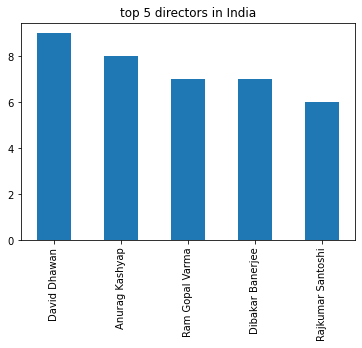

In [ ]:
director_split[(director_split['type']=='Movie') & (director_split['country']=='India') & (director_split['country'].notnull())]['director'].value_counts().iloc[1:6].plot(kind = 'bar')
plt.title("top 5 directors in India")
#Bar plot of Top 5 Movies directors in India

In [ ]:
director_split[director_split['type']=='TV Show'].groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False).head()
#director_split[director_split['type']=='TV Show']['director'].value_counts()
#Top 5 most popular TV show director.

,director,title
299,nan,2446
146,Ken Burns,3
8,Alastair Fothergill,3
140,Jung-ah Im,2
128,Joe Berlinger,2


In [ ]:
df[df['cast'].isna()].index.size
# in 825 Show_id the cast is unknown.

825

#Dealing with missing data columns

In [ ]:
df[(df['director'].isna()) | (df['director']==u"")].index.size
# in 2634 rows the director column has missing entry or empty string.

2634

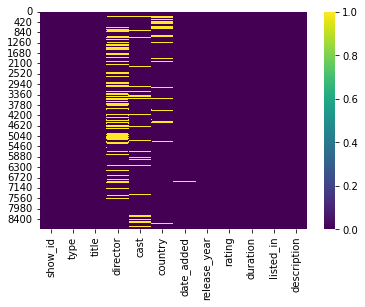

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')
 # we can see director column has most of missing values

In [ ]:
df['country1'] = (df['country'].str.split(",", n = 1, expand = True))[0]
d = df.groupby('country1')['director'].apply(pd.Series.mode)
d.head(73)

country1    
           0              Najwa Najjar
Argentina  0    Raúl Campos, Jan Suter
Australia  0                 Clay Glen
Austria    0         Andreas Prochaska
           1               Andrew Goth
                         ...          
Iceland    2       Óskar Thór Axelsson
India      0              David Dhawan
Indonesia  0          Hanung Bramantyo
Iran       0            Asghar Farhadi
Ireland    0          Yorgos Lanthimos
Name: director, Length: 73, dtype: object

In [ ]:
m = df
m.fillna(method='ffill')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/netflix.csv')
def cons(col):
  spliting =df[col].apply(lambda x : str(x).split(', ')).tolist()
  df_new = pd.DataFrame(spliting, index=df['title'])
  df_new = df_new.stack()
  df_new = pd.DataFrame(df_new)
  df_new.reset_index(inplace=True)
  df_new = df_new[['title',0]]
  df_new.columns = ['title',col]
  df_new=df_new.merge(df, on='title', suffixes=('','_remove'))
  return(df_new)

In [ ]:
df['country'].value_counts()
# Most of the movies/shows made in United States
# so we will fill missing country value as United States
# if you find 'nan' as string values then you can use replace function instead of fillna.
# df["country"].replace(['nan'],['United States'], inplace = True)

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
df["country"].fillna('United States', inplace = True)
df['country1'] = (df['country'].str.split(",", n = 1, expand = True))[0]
d = df.groupby('country1')['director'].first()
m = pd.merge(df, d, how='left', on='country1', suffixes=('_remove',''))
m.drop([i for i in m.columns if 'remove' in i], axis=1, inplace=True)
#country column has some nested values, so we will unpack.  

In [ ]:
d.head()
#we filled the missing director value as first director grouped by relative country.

country1
                        Najwa Najjar
Argentina         Sebastián Schindel
Australia               Simon Wincer
Austria             Daniel Prochaska
Bangladesh    Mostofa Sarwar Farooki
Name: director, dtype: object

In [ ]:
m.head(3)
#we created m dataframe(filled values) by mergeing original df dataframe(director value missing) with d dataframe(directors groupby country)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,dt_Year,dt_Month,country1,director
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,United States,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,South Africa,Daniel Espinosa
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,United States,Kirsten Johnson


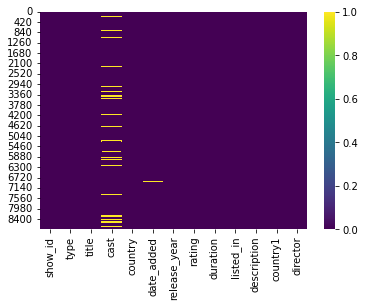

In [ ]:
sns.heatmap(m.isnull(),cmap='viridis')
# merged direcotor column has all filled values.
# use direct mode for nan values of date_added.
# date_added.mode()

In [ ]:
n = df.groupby(['country1','rating'])['show_id'].count()
n.loc['India'].sort_values(ascending=False).head()
#The target audience in India is recommended to be TV-14

rating
TV-14    563
TV-MA    260
TV-PG    139
TV-Y7     16
TV-G       9
Name: show_id, dtype: int64

In [ ]:
n.loc['United States'].sort_values(ascending=False).head()
#The target audience in USA is recommended to be TV-MA

rating
TV-MA    1262
TV-14     669
R         547
PG-13     370
TV-PG     364
Name: show_id, dtype: int64

In [ ]:
cast_split[cast_split['country']=='United States']['cast'].value_counts()

nan                        330
Adam Sandler                20
Samuel L. Jackson           19
Fred Tatasciore             17
Molly Shannon               15
                          ... 
Griffin Robert Faulkner      1
David Pendleton              1
Kim Kold                     1
Yuri Kolokolnikov            1
Ryan Newman                  1
Name: cast, Length: 11586, dtype: int64

In [ ]:
# imputaion of missing values in date_added column
for i in df[df['date_added'].isna()]['release_year'].unique():
  group_mode = df[df['release_year']==i]['date_added'].mode().values[0]
  
  df.loc[df['release_year']==i, 'date_added']=df.loc[df['release_year']==i, 'date_added'].fillna(group_mode)

In [ ]:
for i in df[df['director'].isna()]['country'].unique():
  if i in df[df['director'].isna()]['country'].unique():
    if df[df['country']==i]['director'].mode().any():
      group_mode = df[df['country']==i]['director'].mode().values[0]
      df.loc[df['country']==i, 'director']=df.loc[df['country']==i, 'director'].fillna(group_mode)
# you can try different combinations like director-cast, cast-director, director-contry, cast-country etc.
# if there are still nulls, then just repace it by unknown or mode of whole column.
df['country'].fillna(df['country'].mode().values[0],inplace=True)

#Dealing with datatype issues

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/netflix.csv')

In [ ]:
df['duration'] = df['duration'].apply(lambda x: float(str(x).split(' ')[0]))
# or you can use replace function.
# df['duration'] = df['duration'].str.replace(" min","").str.replace(" Season","")

In [ ]:
df[df['type']=='Movie']['duration'].mean().round(2)
#The average duration of Movies is 99.58 min (~around 100 min)!

99.58

In [ ]:
df[df['type']=='TV Show']['duration'].mean().round(0)
#average duration for TV shows id 2 Seasons

2.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

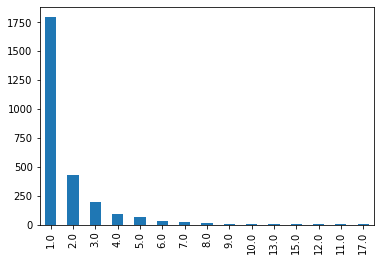

In [ ]:
df[df['type']=='TV Show']['duration'].value_counts(ascending = False).plot(kind = 'bar');
plt.xticks(rotation = 90)
#count of seasons of TV Shows.

In [ ]:
df[(df['type']=='TV Show') & (df['duration']==df[df['type']=='TV Show']['duration'].max())]
#The title of TV show is 'Grey's Anatomy' that has made most seasons.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17.0,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


In [ ]:
cast_dur = cons('cast')
cast_dur[(cast_dur['country']=='United States') & (cast_dur['type']=='Movie')].groupby('cast')['duration'].mean().sort_values(ascending=False).head(10)
#Top 10 casts that have highest average runtime in United States Moives.

cast
Fionn Whitehead       312.0
Alice Lowe            312.0
Asim Chaudhry         312.0
Craig Parkinson       312.0
Will Poulter          217.5
Jack Huston           209.0
Gary Basaraba         209.0
Stephanie Kurtzuba    209.0
Welker White          209.0
Steven Van Zandt      209.0
Name: duration, dtype: float64

In [ ]:
df['bins']= pd.cut(x=df[df['type']=='Movie']['duration'], bins=[50,80, 100,120,150])
df['bins'].value_counts()
#The duration of most of the movies present on Netflix is between 80-100 mins

(80, 100]     2221
(100, 120]    1672
(120, 150]     897
(50, 80]       806
Name: bins, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/netflix.csv')

In [ ]:
df['date_added'].dtypes
#In order to extract the date time data we have to convert the datatype of column from object to datetime.

dtype('O')

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'].dtypes

dtype('<M8[ns]')

In [ ]:
df['dt_Year'] = df['date_added'].dt.year
df['dt_Month'] = df['date_added'].dt.month

In [ ]:
Year_count = pd.DataFrame(df[df['type']=='TV Show']['dt_Year'].value_counts())
Year_count['Growth_Perc']= (((Year_count['dt_Year']/Year_count['dt_Year'].shift(-1))-1)*100).round(2)
Year_count
#Year 2o16 has highest percent of Movie/Show added on netfilx with respect to previous year.
#After Year 2019 the number of movies being added on Netflix start dropping drastically.

,dt_Year,Growth_Perc
2020.0,595,0.51
2019.0,592,17.23
2021.0,505,22.57
2018.0,412,18.05
2017.0,349,98.30
2016.0,176,576.92
2015.0,26,420.00
2014.0,5,0.00
2013.0,5,400.00
2008.0,1,NaN


In [ ]:
df[df['type']=='Movie']['dt_Year'].value_counts()
# In year 2020 highest number of Movies added on Netflix.

2019.0    1424
2020.0    1284
2018.0    1237
2021.0     993
2017.0     839
2016.0     253
2015.0      56
2014.0      19
2011.0      13
2013.0       6
2012.0       3
2009.0       2
2008.0       1
2010.0       1
Name: dt_Year, dtype: int64

In [ ]:
month_df = df[df['type']=='TV Show']['dt_Month'].value_counts()
month_df =pd.DataFrame(month_df)
month_df.sort_values(['dt_Month'], ascending=False).head()
# best time to launch any TV show is in 12th month (December).

,dt_Month
12.0,266
7.0,262
9.0,251
8.0,236
6.0,236


In [ ]:
month_df = df['dt_Month'].value_counts()
month_df =pd.DataFrame(month_df)
month_df.sort_values(['dt_Month'], ascending=False)
# In 7th month (September) highest number of Movies or TV Shows added on Netflix. Netfilx may give membership offers or run advertisement as World Premiere on netfilx.
# In 2nd month (February) least number of Movies or TV Shows added on Netflix. In this month Netfilx may work on maintainance, manuplations, experiments for improvement.

,dt_Month
7.0,827
12.0,813
9.0,770
4.0,764
10.0,760
8.0,755
3.0,742
1.0,738
6.0,728
11.0,705


In [ ]:
month_df['bins']= pd.cut(x=month_df.index, bins=[0,3,6,9,12], labels = ['Winter','Spring','Summer','Autumn'])
d = month_df.groupby('bins')['bins','dt_Month'].sum().reset_index()
d.sort_values(['dt_Month'], ascending=False)
# people are more interested watching movies or TV shows in Summer season (jul-sep).
# people are more interested watching movies or TV shows in Winter season (jan-mar).
# Netfix should upload content or show website based of seasonal theme or festival theme.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,bins,dt_Month
2,Summer,2352
3,Autumn,2278
1,Spring,2124
0,Winter,2043


#Visual Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/netflix.csv')
#First we will visualize the numeric data.
#As we see that most of data is categoral data so we will use a categoral visualization in understand the data.

In [ ]:
Type_count = pd.DataFrame(df['type'].value_counts())
Type_count.columns=['count']
Type_count['percent'] = (df['type'].value_counts(normalize=True)*100).round(0)
Type_count
# 6131 Movies are present in the dataset.
# 2676 TV Shows are present in dataset.
# 70% percentage of titles present in the dataset are TV shows.
# 30% percentage of titles present in the dataset are Movies.

,count,percent
Movie,6131,70.0
TV Show,2676,30.0


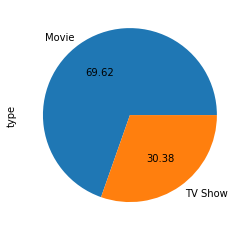

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%0.2f')
# Movies present on dataset are more than double compared to TV Shows.

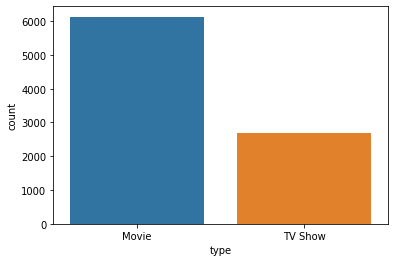

In [ ]:
sns.countplot(data = df , x = 'type')
#count plot for Movies and TV Show

In [ ]:
df['rating'].value_counts().head()
#Most of the TV shows available to watch are rated as TV-MA across all countries.

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

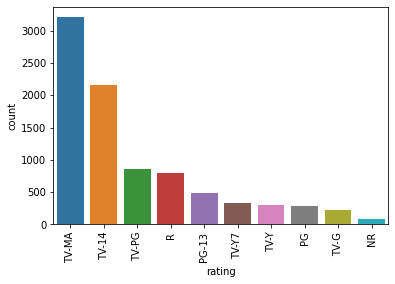

In [ ]:
sns.countplot(data = df , x = 'rating', order=df['rating'].value_counts().index[:10]);
plt.xticks(rotation = 90)
#count plot showing top 10 ratings

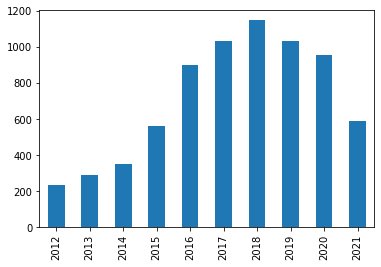

In [ ]:
df.release_year.value_counts().sort_index(ascending = True).tail(10).plot(kind = 'bar')
#Plot showing count of total content released over last 10 year.

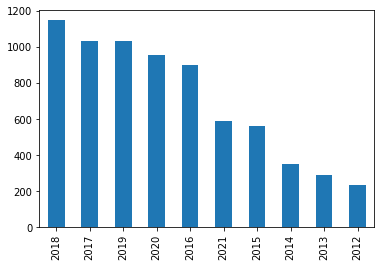

In [ ]:
df.release_year.value_counts(ascending = False).head(10).plot(kind = 'bar')
#top 10 year when the most content released on Netfilx.

Text(0.5, 1.0, 'Country wise Content')

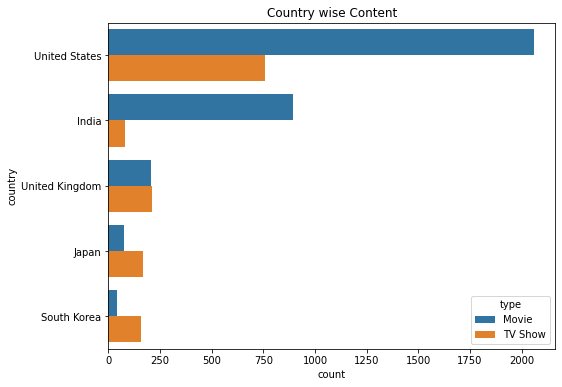

In [ ]:
plt.figure(figsize = [8,6]);
sns.countplot(y='country', order = df['country'].value_counts().index[:5] ,data = df,hue = 'type' )
plt.title('Country wise Content')
#Japanese and South Korean TV Shows counts are more than Movies counts.

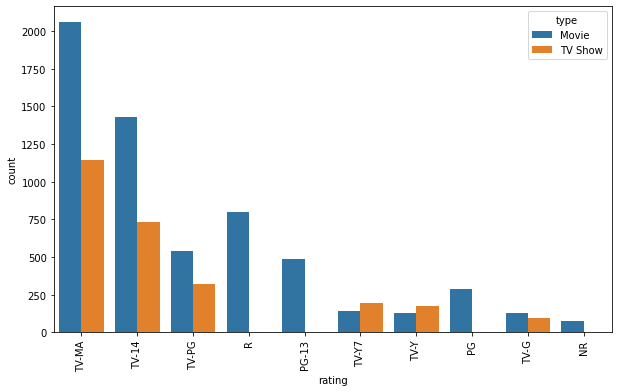

In [ ]:
plt.figure(figsize = [10,6])
sns.countplot(data = df , x = 'rating' , hue = 'type' , order = df.rating.value_counts(ascending = False).iloc[:10].index);
plt.xticks(rotation = 90)
# top 10 ratings in both movie and tv show

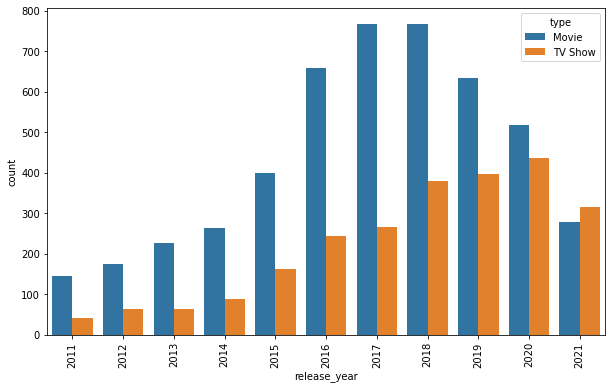

In [ ]:
plt.figure(figsize = [10,6]);
sns.countplot(data = df , x = df[df['release_year']>2010]['release_year'] , hue = 'type' )
plt.xticks(rotation = 90)
# count of movie and tv show in last 10 years

In [ ]:
sns.distplot(df[df['type']=='Movie']['duration'],hist=True,kde=True, 
color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':2})

In [ ]:
plt.figure(figsize = [10,6]);
sns.countplot(data = df , x = df[df['release_year']>2010]['release_year'] , hue = 'type' )
plt.xticks(rotation = 90)

#Business Insights & Recommendations

In [ ]:
# 6131 Movies are present in the dataset (70% percentage).
# 2676 TV Shows are present in the dataset (30% percentage).
#International Movies or TV Shows are quite popular across all countries.
#Drama & Comedy are the most popular genres across the countries.
#Japanese audiences usually prefer watching Anime Series, International TV Shows.
#Japanese and South Korean TV Shows counts are more than Movies counts.
#Anupam Kher has starred in a maximum number of Netflix movies.
#Takahiro Sakurai has starred in a maximum number of Netflix TV Shows.
#Anupam Kher & David Dhawan most popular actor-director pair for movies across India.
#The target audience in USA is recommended to be TV-MA, and Netflix should upload more content in that rating.
#The average duration of Movies is 99.58 min (~ around 100 min). Netfilx should upload content of 80-120 min.
#The TV show 'Grey's Anatomy' has made most seasons. Netfilx should continue uploading and can make a record.
#Year 2o16 has highest percent of Movie/Show added on netfilx with respect to previous year.
#After Year 2019 the number of movies being added on Netflix start dropping drastically.
#The best time to launch any TV show is in 12th month (December) or 7nth month (September).
#In 7th month (September) highest number of Movies or TV Shows added on Netflix. 
#Netfilx may give membership offers or run advertisement as World Premiere on netfilx in that month..
#In 2nd month (February) least number of Movies or TV Shows added on Netflix. 
#In this month Netfilx may work on maintainance, manuplations, experiments for improvement.
#People are more interested watching movies or TV shows in Summer season (jul-sep).
#Netfix should upload content or show website based of seasonal theme or festival theme.
#All the appropriate insights, Recommendations have been mentioned after every code/graph with relevant analysis.